In [28]:
import numpy as np 
import pandas as pd 


df = pd.read_csv('ObesityData.csv')
print(df.shape)
df.head()

(2111, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,3,1
1,1,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,3,1
2,0,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,3,1
3,0,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,3
4,0,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,3,2


In [29]:
X = df.drop("NObeyesdad", axis=1)
X.shape

(2111, 16)

In [30]:
y = df['NObeyesdad']
y.shape

(2111,)

In [31]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=50)

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import sklearn
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
# Creating model object
model_kn = KNeighborsClassifier(n_neighbors=15, leaf_size=20)
# Training Model
model_kn.fit(X_train, y_train)
# Making Prediction
pred_kn = model_kn.predict(X_test)
# Calculating Accuracy Score
kn = sklearn.metrics.accuracy_score(y_test, pred_kn)
print(kn)

0.8132387706855791


0.6855791962174941


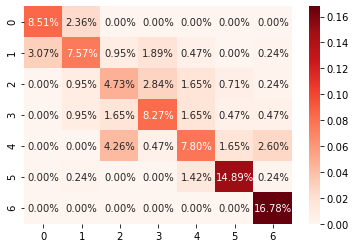

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
# Creating model object
model_lg = LogisticRegression(max_iter=80,random_state=50, n_jobs=50)
# Training Model
model_lg.fit(X_train, y_train)
# Making Prediction
pred_lg = model_lg.predict(X_test)
lg = accuracy_score(y_test, pred_lg)
print(lg)
cm1 = confusion_matrix(y_test, pred_lg)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')

In [34]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings('ignore')
seed = 50
kfold = model_selection.KFold(n_splits=100, random_state=seed)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = KNeighborsClassifier()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X,y, cv=kfold)
print(results.mean())

0.9039177489177489


0.9078014184397163


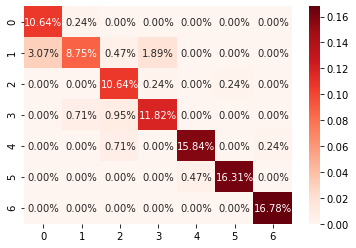

In [35]:
ensemble.fit(X_train,y_train)
pred_dt = ensemble.predict(X_test)
# Calculating Accuracy Score
dt = accuracy_score(y_test, pred_dt)
print(dt)
# confusion Maxtrix
cm2 = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')

In [36]:
# Stochastic Gradient Boosting Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
seed = 50
num_trees =60
kfold = model_selection.KFold(n_splits=25, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.953764705882353


0.966903073286052


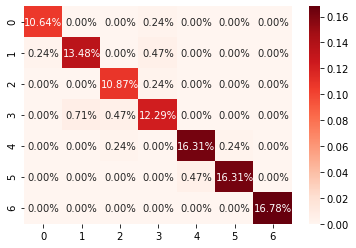

In [37]:
model.fit(X_train,y_train)
pred_dt = model.predict(X_test)
# Calculating Accuracy Score
dt = accuracy_score(y_test, pred_dt)
print(dt)
# confusion Maxtrix
cm2 = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')

0.9408983451536643


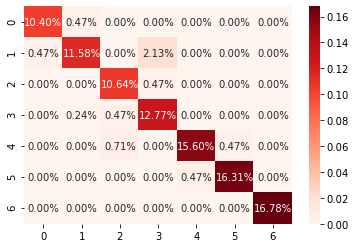

In [38]:
model_dt = DecisionTreeClassifier( max_depth=10, random_state=50)
# Training Model
model_dt.fit(X_train,y_train)

# Making Prediction
pred_dt = model_dt.predict(X_test)
# Calculating Accuracy Score
dt = accuracy_score(y_test, pred_dt)
print(dt)

# confusion Maxtrix
cm2 = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')